### 1. 목표
- 선형회귀 클래스를 다뤄보자.
- 선형모델의 가중치와 절편을 확인해보자.
- 선형모데링 학습에서 중요한 경사하강법을 실습해보자.
- 다항회귀 실습진행

In [76]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# 데이터 로딩
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [78]:
# key 값 확인
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [79]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

![image](https://user-images.githubusercontent.com/108103279/192723321-80f14b4e-44e3-4372-89a9-656673c1fd5b.png)

#### 1.1 문제와 답 분리

In [80]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
y=data['target']
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=928, test_size=0.2)

In [84]:
X_train.shape,y_train.shape

((404, 13), (404,))

In [85]:
X_test.shape,y_test.shape

((102, 13), (102,))

#### 1.2 LinearRegression 클래스
- 수학적해석 방법으로 가중치와 절편을 찾는 모델(최소제곱법)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train,y_train)

LinearRegression()

In [89]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error    # 학습할때도 쓰지만 평가할때도 쓴다
from sklearn.metrics import r2_score  # 회귀모델의 평가방법중 하나 (오차0~1사이로 정규화시켜줌 1에 가까울수록 좋은 모델)

In [90]:
pre = model.predict(X_test)
print("MAE : ", mean_absolute_error(y_test,pre))
print("MSE : ", mean_squared_error(y_test,pre))
print("R2 : ", r2_score(y_test,pre))

MAE :  3.436955876700315
MSE :  26.949298350385785
R2 :  0.7155134486699292


In [91]:
# 가중치와 절편 확인
print('가중치 :', model.coef_)

가중치 : [-1.17616166e-01  4.57248216e-02  2.60971356e-02  3.66519161e+00
 -1.75112248e+01  3.78696087e+00 -5.18334444e-03 -1.53920889e+00
  2.94201676e-01 -1.21127094e-02 -8.66450735e-01  8.41814922e-03
 -5.31982805e-01]


In [92]:
print('절편 : ', model.intercept_)

절편 :  35.85600384015736


#### 선형 모델의 학습 원리
1. 선형모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해서 
MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단
2. 최적의 가중치(w)와 절편(b)을 만들기 위해서 2가지 방식을 활용
  - 해석적방법(최소제곱법) : LinearRegression구현
  - 경사하강법(Gradient Desent Algorithm) : SGDClassifier구현
    - 초기 가중치로 부터 기울기 값을 조금씩 수정해서 적절한 w를 찾아나가는 방식
    - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식
    - 최적화 함수중에 하나

#### 1.4 가중치 변화에 따른 mae변화 그래프를 그려보자

In [93]:
# 성적데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index=['지영','수진','하늘','래호'], columns=['공부시간','성적점수'])
data

,공부시간,성적점수
지영,2,20
수진,4,40
하늘,8,80
래호,9,90


#### 1.5 mse 함수 생성

In [94]:
# 문제, 정답, 가중치를 매개변수로 받는다.
def MSE(X,y,w):
    # 예측값 생성
    y_pre = w*X+0  # y=ax+b
    # 실제값과 얘측값의 차이의 제곱 평균 -> mse(오차)
    error = y-y_pre
    return (error**2).mean() # 평균제곱오차


In [95]:
MSE(data['공부시간'],data['성적점수'],10)  # 가중치 10 , 오차0

0.0

In [96]:
MSE(data['공부시간'],data['성적점수'],15) 

1031.25

##### 1.5.1 그래프 그리기

In [97]:
# 변화하는 가중치(w) 생성
weights = np.linspace(0,20)   # 0~20사이의 값 50개
weights

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [98]:
# for문을 통해 가중치 변경될떄마다 오차 계산
# mse_list 빈 리스트 생성해서 저장

mse_list = []
for w in weights:
    error=MSE(data['공부시간'],data['성적점수'],w) 
    mse_list.append(error)
mse_list

[4125.0,
 3795.1374427321953,
 3479.019158683882,
 3176.6451478550603,
 2888.015410245731,
 2613.1299458558933,
 2351.9887546855475,
 2104.5918367346935,
 1870.939192003332,
 1651.0308204914622,
 1444.8667221990836,
 1252.4468971261972,
 1073.771345272803,
 908.8400666389006,
 757.6530612244896,
 620.2103290295709,
 496.5118700541441,
 386.5576842982092,
 290.3477717617659,
 207.88213244481454,
 139.1607663473552,
 84.1836734693878,
 42.950853810912015,
 15.46230737192834,
 1.718034152436478,
 1.718034152436478,
 15.46230737192834,
 42.95085381091215,
 84.1836734693878,
 139.1607663473552,
 207.88213244481489,
 290.347771761766,
 386.5576842982092,
 496.5118700541442,
 620.2103290295709,
 757.6530612244901,
 908.8400666389006,
 1073.7713452728026,
 1252.4468971261979,
 1444.8667221990838,
 1651.0308204914627,
 1870.939192003332,
 2104.5918367346935,
 2351.988754685547,
 2613.129945855895,
 2888.015410245732,
 3176.6451478550607,
 3479.019158683883,
 3795.1374427321957,
 4125.0]

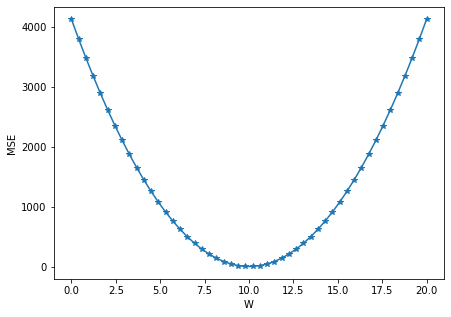

In [99]:
plt.figure(figsize=(7,5))
plt.plot(weights,mse_list,marker='*')
plt.xlabel('W')
plt.ylabel('MSE')
plt.show()

#### 1.6 경사하강법으로 구현된 SGDRegrassor 사용해보기

In [100]:
from sklearn.linear_model import SGDRegressor

In [101]:
sgd_model = SGDRegressor(eta0=0.01, # 러닝레이트 설정(학습률)
                        max_iter=6000, # 반복횟수(가중치 업데이트 횟수) = epoch
                        verbose=1)    # 학습 현황 시각화( 1=true,0=false)

In [102]:
#학습 시켜보기
#fit()
sgd_model.fit(data[['공부시간']],data['성적점수'])

-- Epoch 1
Norm: 8.45, NNZs: 1, Bias: 1.158631, T: 4, Avg. loss: 1049.241887
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.47, NNZs: 1, Bias: 1.293203, T: 8, Avg. loss: 22.675530
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.72, NNZs: 1, Bias: 1.323824, T: 12, Avg. loss: 1.687672
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.78, NNZs: 1, Bias: 1.327490, T: 16, Avg. loss: 0.348252
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.81, NNZs: 1, Bias: 1.325095, T: 20, Avg. loss: 0.207604
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.322242, T: 24, Avg. loss: 0.187431
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.317538, T: 28, Avg. loss: 0.185784
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.312821, T: 32, Avg. loss: 0.182842
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.83, NNZs: 1, Bias: 1.309204, T: 36, Avg. loss: 0.180133
Total training time: 0.00 seconds.
-- Epoch

SGDRegressor(max_iter=6000, verbose=1)

In [103]:
#norm = 가중치, bias = 절편, loss = MSE

In [104]:
print('가중치 :', sgd_model.coef_)
print('절편 : ', sgd_model.intercept_)

가중치 : [9.83904146]
절편 :  [1.17389443]


In [105]:
# 예측시켜보기
# predict
sgd_model.predict([[7],[5]])  # 7시간,5시간 공부했을때


array([70.04718461, 50.3691017 ])

#### 2 다항회귀 실습
  - 선형모델의 수식에서 입력특성에 2차항이 포함된 경우(x값이 제곱인 형태) 2차항처럼 처리...
  - 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어서 성능개선의 여지가 있음
  - 선형 모델은 데이터가 많아질수록 성능 좋아지는 특성이 있다
    이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

In [106]:
from sklearn.datasets import load_boston # 보스턴 주택 가격 데이터

In [107]:
# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

In [108]:
boston = load_boston()

In [109]:
boston # 번치객체(데이터 한다발, 묶음)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [110]:
# 번치 객체 내부의 키값 확인
boston.keys()

# data(필수) : 문제데이터(특성, 피처, 독립변수)
# target(필수) : 답 데이터(label, 종속변수)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [111]:
# 데이터 정보 확인
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 2.1 데이터 분할

In [112]:
# 훈련용 데이터셋과 테스트용 데이터 셋
# 테스트 크기 30%
# 랜덤고정값 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.3, random_state=0) 

# 크기확인
print('훈련용문제', X_train.shape)
print('훈련용답',y_train.shape)
print('테스트용문제',X_test.shape)
print('테스트용답',y_test.shape)

훈련용문제 (354, 13)
훈련용답 (354,)
테스트용문제 (152, 13)
테스트용답 (152,)


##### 특성확장전의 모델 성능 확인

In [113]:
linear_model = LinearRegression()

In [114]:
# 학습
linear_model.fit(X_train,y_train)

LinearRegression()

In [115]:
# r2_score 값 출력해보기
# 평가
linear_model.score(X_test,y_test)  # R squared

0.6733825506400171

#### 2.2 다항회귀 구현
 - 특성확장의 개념중 특성곱을 통해서 다항식을 만들어줌

In [116]:
# 집 가격과 상관관계가 높은 컬럼을 특성확장 해보자 
data_df = pd.DataFrame(X_train, columns=boston.feature_names) 
data_df['PRICE'] = y_train
data_df

# 상관계수 corr 
# -1 ~ 1  0에 가까울수록 상관x, -1과 1에 가까울수록 상대적으로 상관o
data_df.corr()['PRICE'].abs().sort_values(ascending=False)


PRICE      1.000000
LSTAT      0.743289
RM         0.708978
PTRATIO    0.564733
INDUS      0.504361
TAX        0.481319
NOX        0.426690
AGE        0.390942
RAD        0.389533
CRIM       0.388182
ZN         0.386115
B          0.324437
DIS        0.245634
CHAS       0.162395
Name: PRICE, dtype: float64

In [117]:
# 데이터 프레임으로 X_train, X_test변환하기
X_train = pd.DataFrame(X_train, columns=boston.feature_names)
X_test = pd.DataFrame(X_test, columns=boston.feature_names)
display(X_train.head(3))
display(X_test.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50


- 상관관계가 높은 특성에 대해 확장해보기


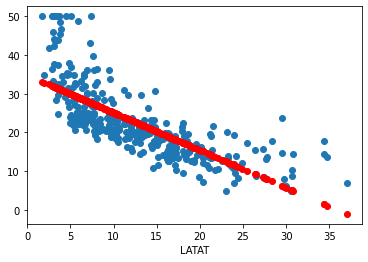

In [118]:
# 확장전 ) 먼저 LSTAT(하위계층비율) 특성만을 가지고 학습 결과 시각화
model = LinearRegression()
model.fit(X_train[['LSTAT']],y_train)
pre = model.predict(X_train[['LSTAT']])

# 산점도 그래프 표현
plt.scatter(X_train['LSTAT'],y_train)
plt.scatter(X_train['LSTAT'],pre , color='red')
plt.xlabel('LATAT')
plt.show()

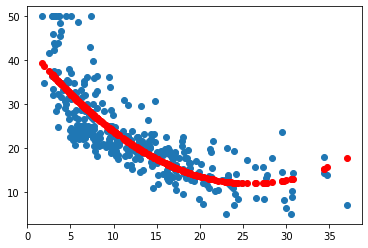

In [119]:
# 확장후 ) LSTAT 특성곱을 통한 데이터를 가지고 학습 결과 시각화
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']
model2 = LinearRegression()
model2.fit(X_train[['LSTAT','LSTAT x LSTAT']],y_train)
pre2 = model2.predict(X_train[['LSTAT','LSTAT x LSTAT']])
pre2

# 산점도 그래프 시각화
plt.scatter(X_train['LSTAT'],y_train)
plt.scatter(X_train['LSTAT'],pre2,color='red')
plt.show()

In [120]:
# 특성확장 -> x_test 적용
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

#학습 평가
linear_model2 = LinearRegression()
linear_model2.fit(X_train,y_train)
linear_model2.score(X_test,y_test)

0.6978697736472481

- RM 특성 확장 전, 후 비교
- X_test에도 반영하여 최종 평가 확인(성능이 개선됐을까>)

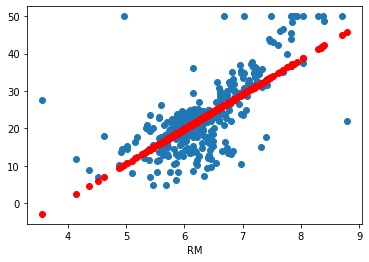

In [121]:
# 확장전 ) 먼저 RM 특성만을 가지고 학습 결과 시각화
model = LinearRegression()
model.fit(X_train[['RM']],y_train)
pre = model.predict(X_train[['RM']])

# 산점도 그래프 표현
plt.scatter(X_train['RM'],y_train)
plt.scatter(X_train['RM'],pre , color='red')
plt.xlabel('RM')
plt.show()

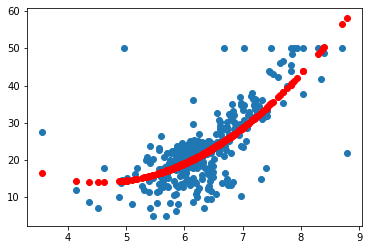

In [122]:
# 확장후 )
X_train['RM x RM'] = X_train['RM'] * X_train['RM']
X_test['RM x RM'] = X_test['RM'] * X_test['RM']
model3 = LinearRegression()
model3.fit(X_train[['RM','RM x RM']],y_train)
pre3 = model3.predict(X_train[['RM','RM x RM']])
pre3

# 산점도 그래프 시각화
plt.scatter(X_train['RM'],y_train)
plt.scatter(X_train['RM'],pre3,color='red')
plt.show()

In [123]:
# test에도 적용
X_test['RM x RM'] = X_test['RM'] * X_test['RM']

# 학습, 평가
linear_model3 = LinearRegression()
linear_model3.fit(X_train,y_train)
linear_model3.score(X_test,y_test)

0.7460776611187943

In [124]:
# 모델 생성
linear_model3 = LinearRegression()
# 모델 학습
linear_model3.fit(X_train,y_train)
# 모델 평가
linear_model3.score(X_test,y_test)

0.7460776611187943

In [125]:
from sklearn.linear_model import Ridge


In [126]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.7460562044505064

- 모든 데이터 특성 확장해보기

In [127]:
# 개별 특성 확장 컬름은 삭제하고 진행
X_train.drop(['LSTAT x LSTAT','RM x RM'], axis=1, inplace=True)
X_test.drop(['LSTAT x LSTAT','RM x RM'], axis=1, inplace=True)

In [128]:
# copy() 원본복사 -> 깊은복사
# z = X.copy() 복사해서 z 담기
# z = X 위치복사 -> 얕은복사, X 데이터 변할때 z변함

In [129]:
extended_X_train = X_train.copy()

In [130]:
for col1 in X_train.columns:  # 13번 반복
    for col2 in X_train.columns:  # 13번 반복
        extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2] 

In [131]:
extended_X_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,...,0.0,21.47184,172.70379,3441.000,49.529754,137.64,15037.17,729.492,13657.3290,1184.0481
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,...,0.0,3.58672,50.53874,453.751,30.282275,23.19,1723.79,143.778,3053.0408,59.7529
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,...,0.0,10.58304,107.44160,1665.472,35.797472,67.84,7411.52,359.552,6693.6032,287.6416


In [132]:
extended_X_test = X_test.copy()
for col1 in X_test.columns:  # 13번 반복
    for col2 in X_test.columns:  # 13번 반복
        extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2] 
extended_X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,...,0.0,3.37640,46.48422,126.248,38.275164,29.36,3156.20,124.046,2754.0414,53.8756
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,...,0.0,6.01343,59.23848,953.000,11.141523,228.72,6346.98,192.506,3489.4095,90.8209
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,...,10.5,5.77500,66.91650,970.200,35.314650,52.50,2898.00,172.200,4134.2700,110.2500


In [133]:
# 컬럼명만 확인
extended_X_train.columns[:30]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIMxCRIM', 'CRIMxZN', 'CRIMxINDUS',
       'CRIMxCHAS', 'CRIMxNOX', 'CRIMxRM', 'CRIMxAGE', 'CRIMxDIS', 'CRIMxRAD',
       'CRIMxTAX', 'CRIMxPTRATIO', 'CRIMxB', 'CRIMxLSTAT', 'ZNxCRIM', 'ZNxZN',
       'ZNxINDUS', 'ZNxCHAS'],
      dtype='object')

In [134]:
# 모델 생성
linear_model3 = LinearRegression()
# 모델 학습
linear_model3.fit(extended_X_train,y_train)
# 모델 평가
linear_model3.score(extended_X_test,y_test)

0.6486839500099861

#### 2.3 정규화 모델 등장!
 - W값 제어해서 과대적합 해소
 - Ridge, Lasso : W를 제어하기 위해 나온 모델(Ridgh가 규제를 상대적으로 적용해서 좀 더 많이 씀)

In [135]:
from sklearn.linear_model import Ridge

In [136]:
ridge_model = Ridge(alpha=100) # alpha : 규제 정도 지정(값이 크면 규제 낮아짐) 기본값 1

In [137]:
ridge_model.fit(extended_X_train,y_train)
ridge_model.score(extended_X_test,y_test)

0.7767755128070641

#### 2.4 규제모델 하이퍼파라미터 튜닝

In [138]:
from sklearn.linear_model import Lasso

In [142]:
# 7개 규제 적용(규제 작은 -> 큰)
R_score_list=[]
L_score_list=[]
for alpha in [0.001, 0.01, 0.1, 1, 10,100, 1000]:
    R_model = Ridge(alpha=alpha) # L2규제
    L_model = Lasso(alpha=alpha) # L1규제
    #모델 학습
    R_model.fit(extended_X_train,y_train)
    L_model.fit(extended_X_train,y_train)
    # 모델 평가
    R_score_list.append(R_model.score(extended_X_test,y_test))
    L_score_list.append(L_model.score(extended_X_test,y_test))

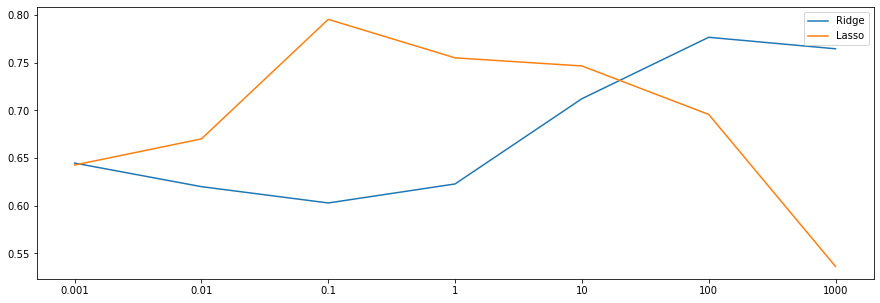

In [146]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(range(7),R_score_list, label='Ridge')
plt.plot(range(7),L_score_list, label='Lasso')
plt.legend()
plt.xticks(range(7),[0.001, 0.01, 0.1, 1, 10,100, 1000])   # 1에는0.001, 2에는0.01, 3에는0.1 이런식으로 적용
plt.show()